# 图像 segment 识别

In [9]:
from transformers.utils import logging
logging.set_verbosity_error()

In [14]:
import torch
from transformers import pipeline
sam_pipe = pipeline("mask-generation", "Zigeng/SlimSAM-uniform-77", device="cpu")

In [16]:
sam_pipe.torch_dtype

torch.float32

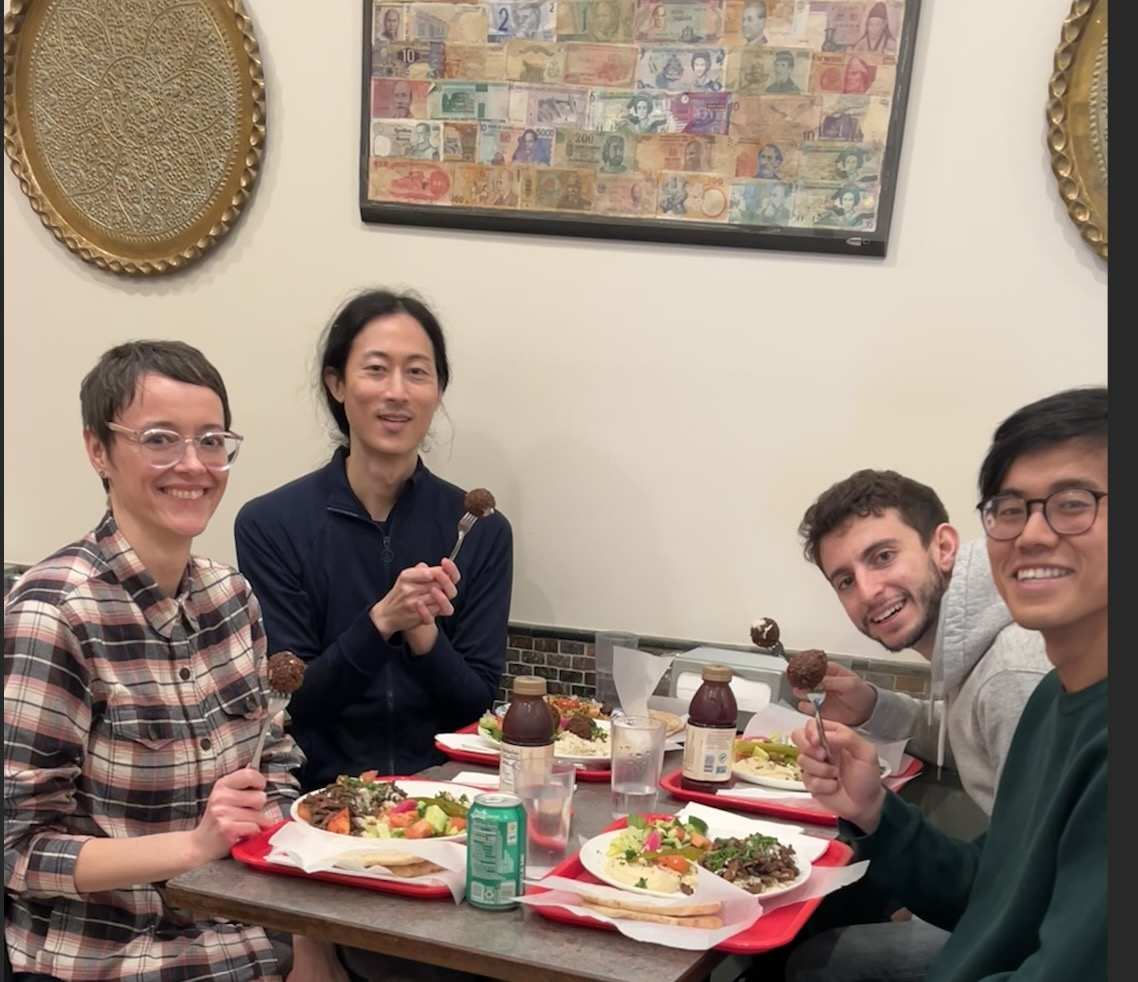

In [17]:
from PIL import Image
raw_image = Image.open("friends.jpg")
raw_image

In [18]:
output = sam_pipe(raw_image, point_per_batch=32)

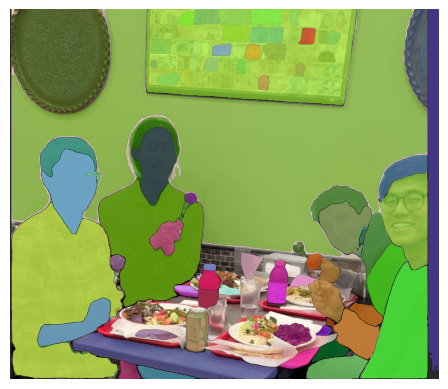

In [19]:
from helper import show_pipe_masks_on_image
image_output = show_pipe_masks_on_image(raw_image, output)

In [20]:
from transformers import SamModel, SamProcessor
model = SamModel.from_pretrained("Zigeng/SlimSAM-uniform-77")
processor = SamProcessor.from_pretrained("Zigeng/SlimSAM-uniform-77")

In [21]:
model

SamModel(
  (shared_image_embedding): SamPositionalEmbedding()
  (vision_encoder): SamVisionEncoder(
    (patch_embed): SamPatchEmbeddings(
      (projection): Conv2d(3, 168, kernel_size=(16, 16), stride=(16, 16))
    )
    (layers): ModuleList(
      (0-11): 12 x SamVisionLayer(
        (layer_norm1): LayerNorm((168,), eps=1e-06, elementwise_affine=True)
        (attn): SamVisionAttention(
          (qkv): Linear(in_features=168, out_features=504, bias=True)
          (proj): Linear(in_features=168, out_features=168, bias=True)
        )
        (layer_norm2): LayerNorm((168,), eps=1e-06, elementwise_affine=True)
        (mlp): SamMLPBlock(
          (lin1): Linear(in_features=168, out_features=696, bias=True)
          (lin2): Linear(in_features=696, out_features=168, bias=True)
          (act): GELUActivation()
        )
      )
    )
    (neck): SamVisionNeck(
      (conv1): Conv2d(168, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (layer_norm1): SamLayerNorm()
      (c

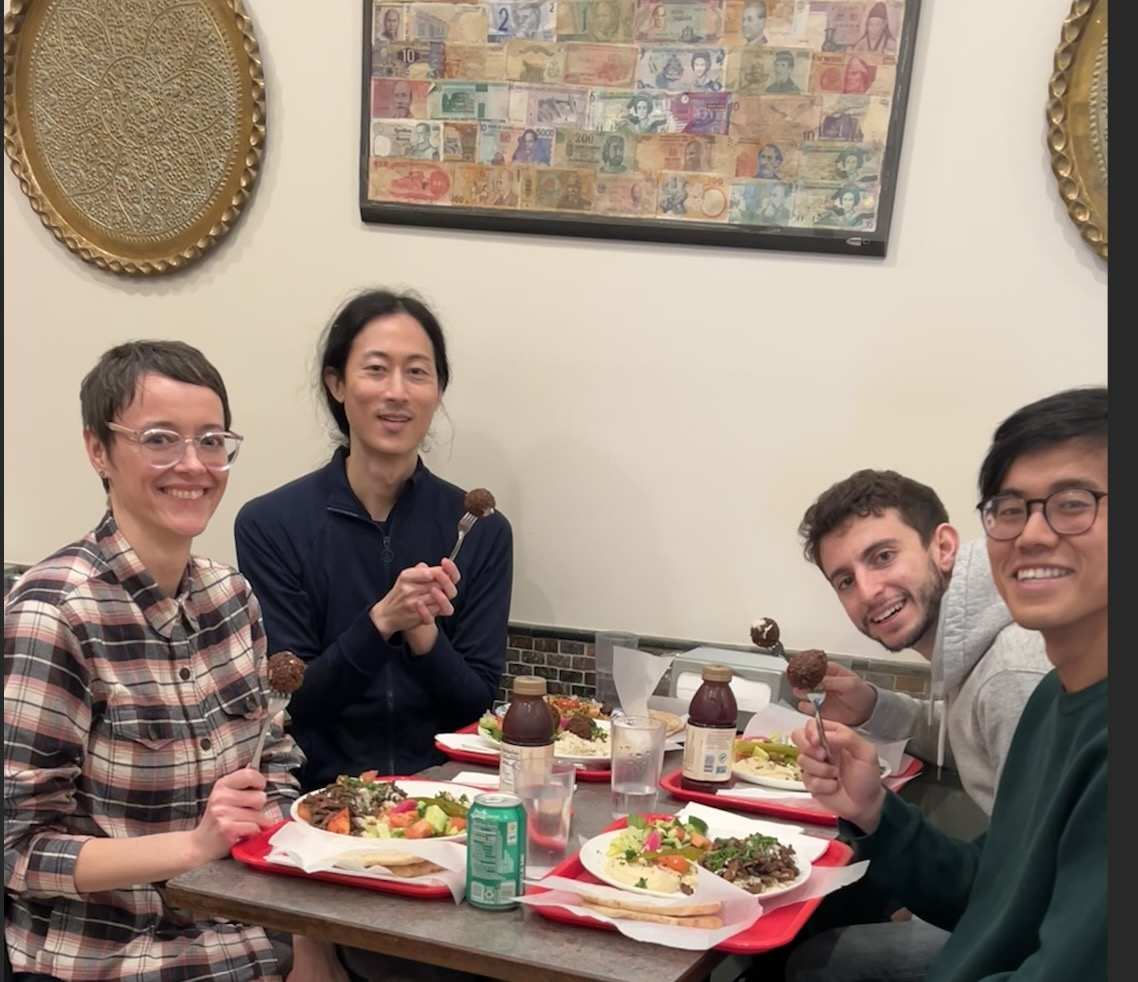

In [22]:
raw_image

In [23]:
input_points=[[[1600,700]]]

In [24]:
inputs = processor(raw_image,input_points=input_points,return_tentors="pt")

/opt/anaconda3/envs/huggingface/lib/python3.11/site-packages/transformers/image_processing_utils.py:42: UserWarning: The following named arguments are not valid for `SamImageProcessor.preprocess` and were ignored: 'point_pad_value'
  return self.preprocess(images, **kwargs)
